In [1]:
import os
import sys

sys.path.append(os.path.abspath(os.path.join('..', '..')))

In [2]:
%ls

 Volume in drive C is Acer
 Volume Serial Number is 70D2-9BA1

 Directory of c:\Users\melan\shared-folder\Thesis\SSL-for-Quantum-Cirucits-Generation\QCCL\notebooks

20/10/2024  13:17    <DIR>          .
28/09/2024  21:20    <DIR>          ..
24/09/2024  19:19         5,736,098 best_model.pth
24/09/2024  19:18               787 hyperparam_tuning_results_with_configs.yaml
11/10/2024  10:46           132,935 training.ipynb
24/09/2024  19:19            24,818 training_best_history.png
24/09/2024  18:59           204,856 training_byol big embedding.ipynb
14/10/2024  12:11           247,018 training_byol.ipynb
19/09/2024  16:50           248,587 training_norms_visual.ipynb
01/10/2024  07:38           441,652 training-visual.ipynb
29/10/2024  19:09           553,697 transforms_debugging.ipynb
               9 File(s)      7,590,448 bytes
               2 Dir(s)  82,249,179,136 bytes free


In [3]:
from qiskit import QuantumCircuit
from Data.QuantumCircuitGraph import QuantumCircuitGraph


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "c:\Users\melan\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "c:\Users\melan\AppData\Local\Programs\Python\Python312\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "c:\Users\melan\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipykernel\kernelapp.py", 

In [4]:
# Settings

GATE_TYPE_MAP = {
    'cx': 0, 
    'h': 1, 
    'x': 2,
    'z': 3,
    't': 4
    # Add here all possible gate types
} # map gate type to index in one-hot encoding
# add id always in last position
GATE_TYPE_MAP['id'] = len(GATE_TYPE_MAP)


QuantumCircuitGraph.set_gate_type_map(GATE_TYPE_MAP)
QuantumCircuitGraph.set_include_params(False)
QuantumCircuitGraph.set_include_identity_gates(False)
QuantumCircuitGraph.set_differentiate_cx(True)


print("Modified GATE_TYPE_MAP:", QuantumCircuitGraph.GATE_TYPE_MAP)
print("Modified include_params:", QuantumCircuitGraph.include_params)
print("Modified include_identity_gates:", QuantumCircuitGraph.include_identity_gates)
print("Modified differentiate_cx:", QuantumCircuitGraph.differentiate_cx)

Modified GATE_TYPE_MAP: {'cx': 0, 'h': 1, 'x': 2, 'z': 3, 't': 4, 'id': 5}
Modified include_params: False
Modified include_identity_gates: False
Modified differentiate_cx: True


### Test AddIdentityGatesTransformation

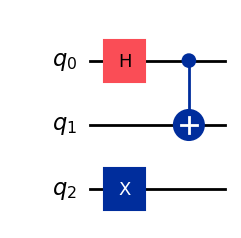

In [5]:
# Create a simple quantum circuit
num_qubits = 3
qc = QuantumCircuit(num_qubits)
qc.h(0)
qc.cx(0, 1)
qc.x(2)

# Visualize the initial quantum circuit
qc.draw('mpl')

In [6]:
# Convert to graph representation
qcg = QuantumCircuitGraph(qc)

In [7]:
from QCCL.transformations import AddIdentityGatesTransformation

# Create an instance of the SwapControlTargetTransformation class and apply it
transformation = AddIdentityGatesTransformation(qcg)

# Apply the transformation
transformed_qcg = transformation.apply()  # Applying the transformation
transformed_circuit = transformed_qcg.quantum_circuit  # Extract the transformed circuit


Transformed Circuit:


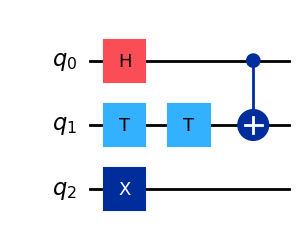

In [8]:
# Display the transformed circuit
print("\nTransformed Circuit:")
transformed_circuit.draw(output='mpl')

### Test RemoveIdentityGatesTransformation

In [9]:
from QCCL.transformations import RemoveIdentityGatesTransformation

# Create an instance of the SwapControlTargetTransformation class and apply it
reverse_transformation = RemoveIdentityGatesTransformation(transformed_qcg)

# Apply the transformation
transformed_qcg = reverse_transformation.apply()  # Applying the transformation
transformed_circuit = transformed_qcg.quantum_circuit  # Extract the transformed circuit


Transformed Circuit:


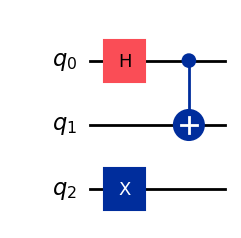

In [10]:
# Display the transformed circuit
print("\nTransformed Circuit:")
transformed_circuit.draw(output='mpl')

### Test SwapControlTargetTransformation


1st PATTERN: CNOT -> CNOT -> H, H, CNOT, H, H

Original Circuit:


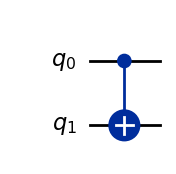

In [11]:
qc = QuantumCircuit(2)
qc.cx(0, 1)  # Add CNOT gate

# Display the original circuit
print("Original Circuit:")
qc.draw(output='mpl')

In [12]:
# Convert to graph representation
qcg = QuantumCircuitGraph(qc)

In [13]:
from QCCL.transformations import SwapControlTargetTransformation

# Create an instance of the SwapControlTargetTransformation class and apply it
transformation = SwapControlTargetTransformation(qcg)

# Apply the transformation

transformed_qcg = transformation.apply()  # Applying the transformation
transformed_circuit = transformed_qcg.quantum_circuit  # Extract the transformed circuit



Transformed Circuit:


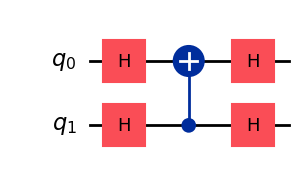

In [14]:

# Display the transformed circuit
print("\nTransformed Circuit:")
transformed_circuit.draw(output='mpl')

2nd PATTERN: CNOT, H, H -> H, H, CNOT

Original Circuit:


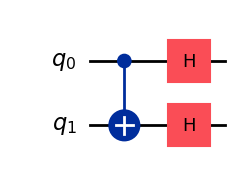

In [15]:
qc = QuantumCircuit(2)
qc.cx(0, 1)  # Add CNOT gate
qc.h(0)
qc.h(1)

# Display the original circuit
print("Original Circuit:")
qc.draw(output='mpl')

In [16]:
# Convert to graph representation
qcg = QuantumCircuitGraph(qc)

In [17]:
from QCCL.transformations import SwapControlTargetTransformation

# Create an instance of the SwapControlTargetTransformation class and apply it
transformation = SwapControlTargetTransformation(qcg)

# Apply the transformation

transformed_qcg = transformation.apply()  # Applying the transformation
transformed_circuit = transformed_qcg.quantum_circuit  # Extract the transformed circuit


Transformed Circuit:


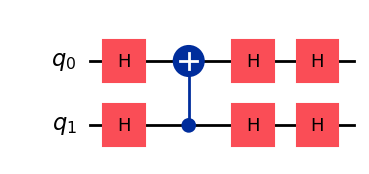

In [18]:
# Display the transformed circuit
print("\nTransformed Circuit:")
transformed_circuit.draw(output='mpl')

2nd PATTERN: H, CNOT, H -> H, CNOT, H

Original Circuit:


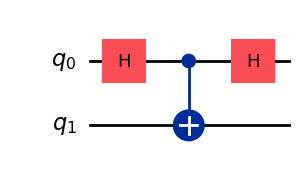

In [19]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)  # Add CNOT gate
qc.h(0)

# Display the original circuit
print("Original Circuit:")
qc.draw(output='mpl')


Transformed Circuit:


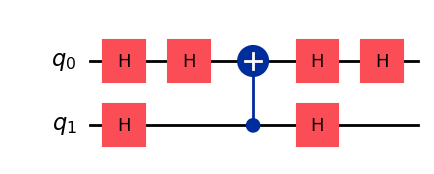

In [20]:
# Convert to graph representation
qcg = QuantumCircuitGraph(qc)

# Create an instance of the SwapControlTargetTransformation class and apply it
transformation = SwapControlTargetTransformation(qcg)

# Apply the transformation
transformed_qcg = transformation.apply()  # Applying the transformation
transformed_circuit = transformed_qcg.quantum_circuit  # Extract the transformed circuit

# Display the transformed circuit
print("\nTransformed Circuit:")
transformed_circuit.draw(output='mpl')

### Test CNOTDecompositionTransformation

1st PATTERN: CNOT -> CNOT, CNOT, CNOT, CNOT

Original Circuit:


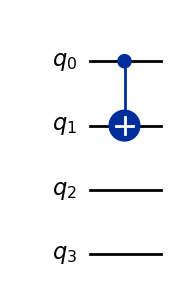

In [ ]:
qc = QuantumCircuit(4)
qc.cx(0, 1)  # Add CNOT gate

# Display the original circuit
print("Original Circuit:")
qc.draw(output='mpl')


Transformed Circuit:


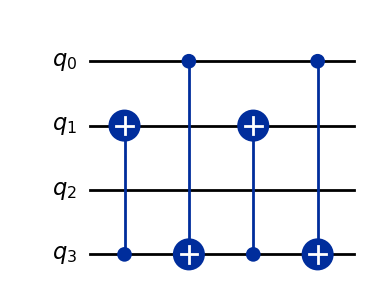

In [ ]:
from QCCL.transformations import CNOTDecompositionTransformation

# Convert to graph representation
qcg = QuantumCircuitGraph(qc)

# Create an instance of the SwapControlTargetTransformation class and apply it
transformation = CNOTDecompositionTransformation(qcg)

# Apply the transformation
transformed_qcg = transformation.apply()  # Applying the transformation
transformed_circuit = transformed_qcg.quantum_circuit  # Extract the transformed circuit

# Display the transformed circuit
print("\nTransformed Circuit:")
transformed_circuit.draw(output='mpl')

2st PATTERN: CNOT, CNOT, CNOT, CNOT -> CNOT or 4 CNOTs

Original Circuit:


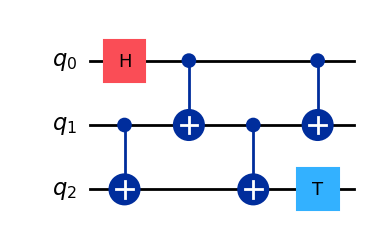

In [ ]:
qc = QuantumCircuit(3)
 
qc.h(0)
qc.cx(1, 2)  
qc.cx(0, 1)  
qc.cx(1, 2)
qc.cx(0, 1) 
qc.t(2)

# Display the original circuit
print("Original Circuit:")
qc.draw(output='mpl')


Transformed Circuit:


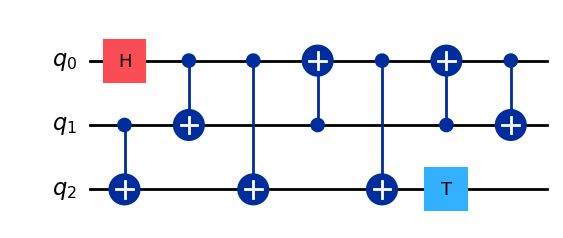

In [ ]:
# Convert to graph representation
qcg = QuantumCircuitGraph(qc)

# Create an instance of the SwapControlTargetTransformation class and apply it
transformation = CNOTDecompositionTransformation(qcg)

# Apply the transformation
transformed_qcg = transformation.apply()  # Applying the transformation
transformed_circuit = transformed_qcg.quantum_circuit  # Extract the transformed circuit

# Display the transformed circuit
print("\nTransformed Circuit:")
transformed_circuit.draw(output='mpl')

### Test ChangeOfBasisTransformation

In [25]:
from qiskit.circuit.library import HGate, ZGate, XGate, TGate
import random
from QCCL.transformations import ChangeOfBasisTransformation

1st PATTERN: single H, Z, or X

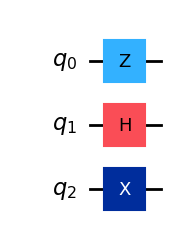

In [ ]:
# Circuit with HZH pattern
qc = QuantumCircuit(3)
qc.z(0)
qc.h(1)
qc.x(2)

qc.draw('mpl')


Transformed Circuit:


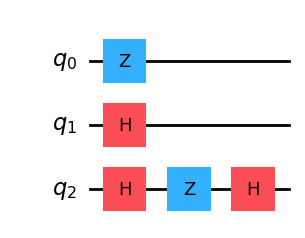

In [ ]:
# Convert to graph representation
qcg = QuantumCircuitGraph(qc)

# Create an instance of the SwapControlTargetTransformation class and apply it
transformation = ChangeOfBasisTransformation(qcg)

# Apply the transformation
transformed_qcg = transformation.apply()  # Applying the transformation
transformed_circuit = transformed_qcg.quantum_circuit  # Extract the transformed circuit

# Display the transformed circuit
print("\nTransformed Circuit:")
transformed_circuit.draw(output='mpl')

2nd PATTERN: HZ, ZH, HX, XH

Original Circuit:


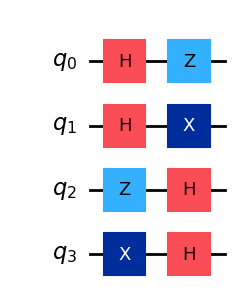

In [ ]:
qc = QuantumCircuit(4)
qc.h(0)
qc.z(0)
qc.h(1)
qc.x(1)
qc.z(2)
qc.h(2)
qc.x(3)
qc.h(3)

# Display the original circuit
print("Original Circuit:")
qc.draw(output='mpl')


Transformed Circuit:


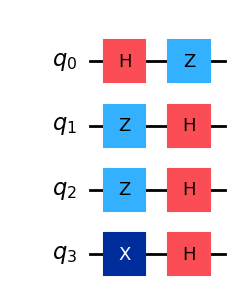

In [ ]:
# Convert to graph representation
qcg = QuantumCircuitGraph(qc)

# Create an instance of the SwapControlTargetTransformation class and apply it
transformation = ChangeOfBasisTransformation(qcg)

# Apply the transformation
transformed_qcg = transformation.apply()  # Applying the transformation
transformed_circuit = transformed_qcg.quantum_circuit  # Extract the transformed circuit

# Display the transformed circuit
print("\nTransformed Circuit:")
transformed_circuit.draw(output='mpl')

3rd PATTERN: HXH, HZH, ...

Original Circuit:


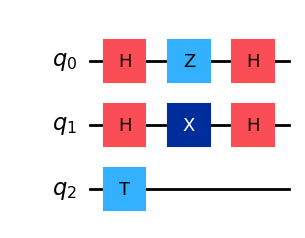

In [ ]:
qc = QuantumCircuit(3)
qc.h(0)
qc.z(0)
qc.h(0)
qc.h(1)
qc.t(2)
qc.x(1)
qc.h(1)

# Display the original circuit
print("Original Circuit:")
qc.draw(output='mpl')


Transformed Circuit:


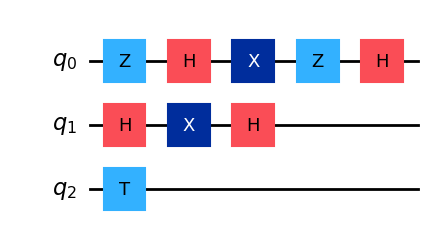

In [ ]:
# Convert to graph representation
qcg = QuantumCircuitGraph(qc)

# Create an instance of the SwapControlTargetTransformation class and apply it
transformation = ChangeOfBasisTransformation(qcg)

# Apply the transformation
transformed_qcg = transformation.apply()  # Applying the transformation
transformed_circuit = transformed_qcg.quantum_circuit  # Extract the transformed circuit

# Display the transformed circuit
print("\nTransformed Circuit:")
transformed_circuit.draw(output='mpl')

### Test ParallelXTransformation

1st PATTERN: parallel X

Original Circuit:


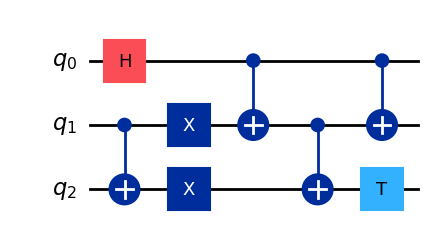

In [ ]:
qc = QuantumCircuit(3)
 
qc.h(0)
qc.cx(1, 2)  
qc.x(1)
qc.x(2)
qc.cx(0, 1)  
qc.cx(1, 2)
qc.cx(0, 1) 
qc.t(2)

qcg = QuantumCircuitGraph(qc)

# Display the original circuit
print("Original Circuit:")
qc.draw(output='mpl')

In [33]:
gates = qc.data
qubits = set()

for gate in gates:
    qubits.update([qubit._index for qubit in gate.qubits])

len(qubits)

3


Transformed Circuit:


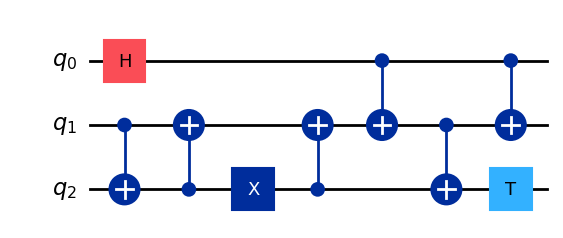

In [ ]:
from QCCL.transformations import ParallelXTransformation

# Convert to graph representation
qcg = QuantumCircuitGraph(qc)

# Create an instance of the SwapControlTargetTransformation class and apply it
transformation = ParallelXTransformation(qcg)

# Apply the transformation
transformed_qcg = transformation.apply()  # Applying the transformation
transformed_circuit = transformed_qcg.quantum_circuit  # Extract the transformed circuit

# Display the transformed circuit
print("\nTransformed Circuit:")
transformed_circuit.draw(output='mpl')

2nd PATTERN: cx-x-cx

Original Circuit:


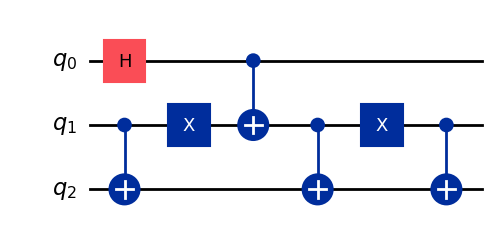

In [35]:
qc = QuantumCircuit(3)
 
qc.h(0)
qc.cx(1, 2)  
qc.x(1)
qc.cx(0, 1)  
qc.cx(1, 2)
qc.x(1)
qc.cx(1, 2)

qcg = QuantumCircuitGraph(qc)

# Display the original circuit
print("Original Circuit:")
qc.draw(output='mpl')


Transformed Circuit:


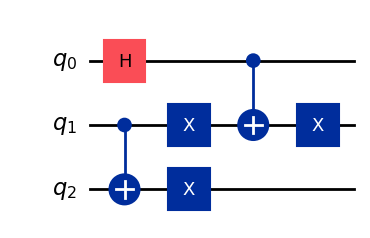

In [ ]:
# Convert to graph representation
qcg = QuantumCircuitGraph(qc)

# Create an instance of the SwapControlTargetTransformation class and apply it
transformation = ParallelXTransformation(qcg)

# Apply the transformation
transformed_qcg = transformation.apply()  # Applying the transformation
transformed_circuit = transformed_qcg.quantum_circuit  # Extract the transformed circuit

# Display the transformed circuit
print("\nTransformed Circuit:")
transformed_circuit.draw(output='mpl')

TEST: no match

Original Circuit:


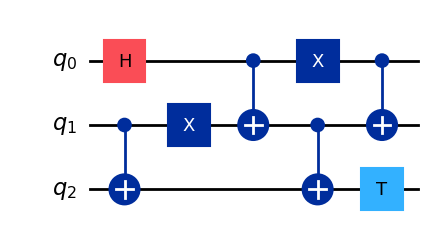

In [37]:
qc = QuantumCircuit(3)
 
qc.h(0)
qc.cx(1, 2)  
qc.x(1)
qc.cx(0, 1) 
qc.x(0) 
qc.cx(1, 2)
qc.cx(0, 1) 
qc.t(2)

qcg = QuantumCircuitGraph(qc)

# Display the original circuit
print("Original Circuit:")
qc.draw(output='mpl')

In [38]:
# Convert to graph representation
qcg = QuantumCircuitGraph(qc)

# Create an instance of the SwapControlTargetTransformation class and apply it
transformation = ParallelXTransformation(qcg)

try:
    # Apply the transformation
    transformed_qcg = transformation.apply()  # Applying the transformation
    transformed_circuit = transformed_qcg.quantum_circuit  # Extract the transformed circuit

    # Display the transformed circuit
    print("\nTransformed Circuit:")
    transformed_circuit.draw(output='mpl')

except Exception as e:
    print("Transformation failed with error:", e)

Transformation failed with error: No matching subgraphs found for the given pattern.


### Test ParallelZTransformation

1st PATTERN: parallel Z

Original Circuit:


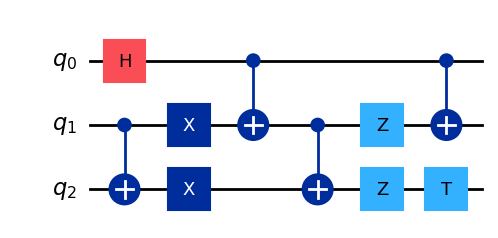

In [39]:
qc = QuantumCircuit(3)
 
qc.h(0)
qc.cx(1, 2)  
qc.x(1)
qc.x(2)
qc.cx(0, 1)  
qc.cx(1, 2)
qc.z(1)
qc.cx(0, 1) 
qc.z(2)
qc.t(2)

qcg = QuantumCircuitGraph(qc)

# Display the original circuit
print("Original Circuit:")
qc.draw(output='mpl')


Transformed Circuit:


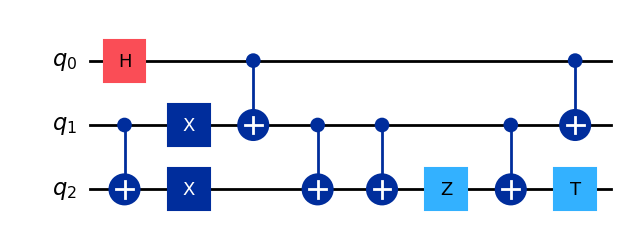

In [40]:
from QCCL.transformations import ParallelZTransformation

# Convert to graph representation
qcg = QuantumCircuitGraph(qc)

# Create an instance of the SwapControlTargetTransformation class and apply it
transformation = ParallelZTransformation(qcg)

# Apply the transformation
transformed_qcg = transformation.apply()  # Applying the transformation
transformed_circuit = transformed_qcg.quantum_circuit  # Extract the transformed circuit

# Display the transformed circuit
print("\nTransformed Circuit:")
transformed_circuit.draw(output='mpl')

2nd PATTERN: cx-z-cx

Original Circuit:


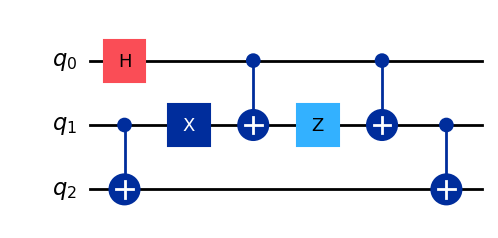

In [41]:
qc = QuantumCircuit(3)
 
qc.h(0)
qc.cx(1, 2)  
qc.x(1)
qc.cx(0, 1)  
qc.z(1)
qc.cx(0, 1)  
qc.cx(1, 2)


qcg = QuantumCircuitGraph(qc)

# Display the original circuit
print("Original Circuit:")
qc.draw(output='mpl')


Transformed Circuit:


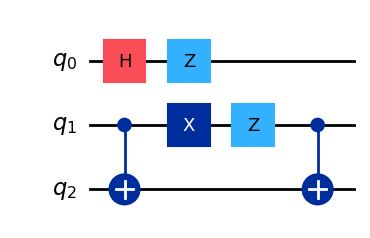

In [42]:
# Convert to graph representation
qcg = QuantumCircuitGraph(qc)

# Create an instance of the SwapControlTargetTransformation class and apply it
transformation = ParallelZTransformation(qcg)

# Apply the transformation
transformed_qcg = transformation.apply()  # Applying the transformation
transformed_circuit = transformed_qcg.quantum_circuit  # Extract the transformed circuit

# Display the transformed circuit
print("\nTransformed Circuit:")
transformed_circuit.draw(output='mpl')

Parallel Z at the start/end

Original Circuit:


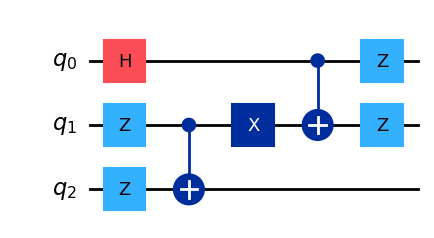

In [43]:
qc = QuantumCircuit(3)
 
qc.h(0)
qc.z(1)
qc.z(2)
qc.cx(1, 2)  
qc.x(1)
qc.cx(0, 1)  
qc.z(1)
qc.z(0)


qcg = QuantumCircuitGraph(qc)

# Display the original circuit
print("Original Circuit:")
qc.draw(output='mpl')


Transformed Circuit:


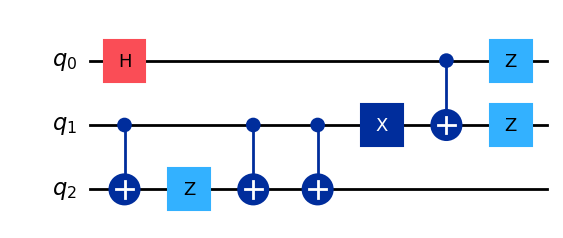

In [44]:
# Convert to graph representation
qcg = QuantumCircuitGraph(qc)

# Create an instance of the SwapControlTargetTransformation class and apply it
transformation = ParallelZTransformation(qcg)

# Apply the transformation
transformed_qcg = transformation.apply()  # Applying the transformation
transformed_circuit = transformed_qcg.quantum_circuit  # Extract the transformed circuit

# Display the transformed circuit
print("\nTransformed Circuit:")
transformed_circuit.draw(output='mpl')

### Test CommuteCNOTRotationTransformation

Original Circuit:


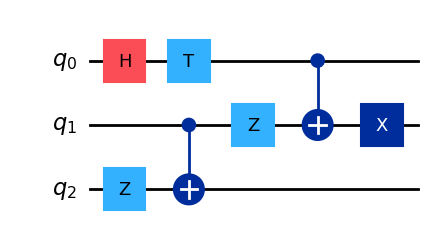

In [45]:
qc = QuantumCircuit(3)
 
qc.h(0)
qc.t(0)
qc.z(2)
qc.cx(1, 2)  
qc.z(1)
qc.cx(0, 1)  
qc.x(1)



qcg = QuantumCircuitGraph(qc)

# Display the original circuit
print("Original Circuit:")
qc.draw(output='mpl')


Transformed Circuit:


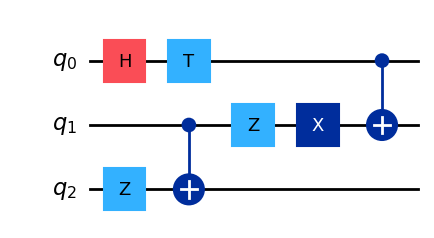

In [46]:
from QCCL.transformations import CommuteCNOTRotationTransformation

# Convert to graph representation
qcg = QuantumCircuitGraph(qc)

# Create an instance of the SwapControlTargetTransformation class and apply it
transformation = CommuteCNOTRotationTransformation(qcg)

# Apply the transformation
transformed_qcg = transformation.apply()  # Applying the transformation
transformed_circuit = transformed_qcg.quantum_circuit  # Extract the transformed circuit

# Display the transformed circuit
print("\nTransformed Circuit:")
transformed_circuit.draw(output='mpl')

### Test CommuteCNOTsTransformation

Original Circuit:


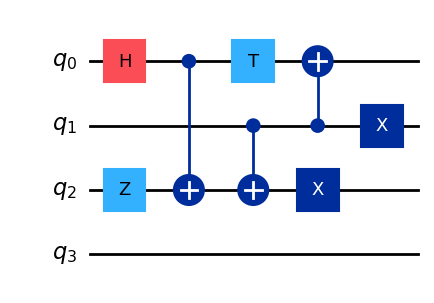

In [47]:
qc = QuantumCircuit(4)
 
qc.h(0)
qc.z(2)
qc.cx(0,2)
qc.t(0)
qc.cx(1, 2)  

qc.cx(1, 0)  
qc.x(1)
qc.x(2)


qcg = QuantumCircuitGraph(qc)

# Display the original circuit
print("Original Circuit:")
qc.draw(output='mpl')


Transformed Circuit:


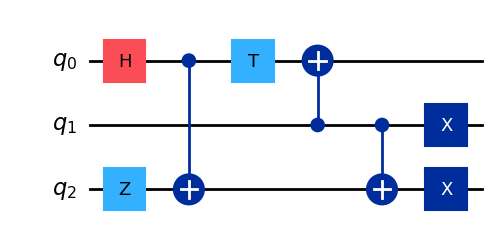

In [48]:
from QCCL.transformations import CommuteCNOTsTransformation

# Convert to graph representation
qcg = QuantumCircuitGraph(qc)

# Create an instance of the SwapControlTargetTransformation class and apply it
transformation = CommuteCNOTsTransformation(qcg)

# Apply the transformation
transformed_qcg = transformation.apply()  # Applying the transformation
transformed_circuit = transformed_qcg.quantum_circuit  # Extract the transformed circuit

# Display the transformed circuit
print("\nTransformed Circuit:")
transformed_circuit.draw(output='mpl')

In [49]:
gates = qc.data
qubits = set()

for gate in gates:
    qubits.update([qubit._index for qubit in gate.qubits])

len(qubits)

3

### Test SwapCNOTsTransformation

Original Circuit:


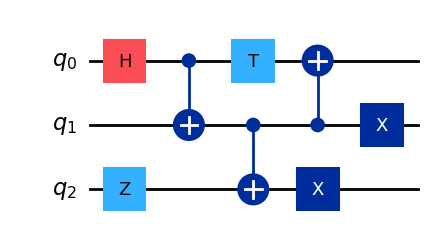

In [50]:
qc = QuantumCircuit(3)
 
qc.h(0)
qc.z(2)
qc.cx(0,1)
qc.t(0)
qc.cx(1, 2)  

qc.cx(1, 0)  
qc.x(1)
qc.x(2)


qcg = QuantumCircuitGraph(qc)

# Display the original circuit
print("Original Circuit:")
qc.draw(output='mpl')


Transformed Circuit:


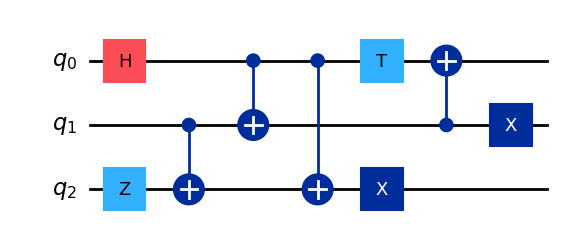

In [51]:
from QCCL.transformations import SwapCNOTsTransformation

# Convert to graph representation
qcg = QuantumCircuitGraph(qc)

# Create an instance of the SwapControlTargetTransformation class and apply it
transformation = SwapCNOTsTransformation(qcg)

# Apply the transformation
transformed_qcg = transformation.apply()  # Applying the transformation
transformed_circuit = transformed_qcg.quantum_circuit  # Extract the transformed circuit

# Display the transformed circuit
print("\nTransformed Circuit:")
transformed_circuit.draw(output='mpl')


Transformed Circuit:


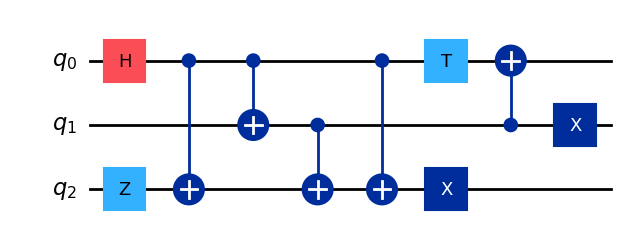

In [52]:
# reverse transformation

qc = transformed_circuit

# Convert to graph representation
qcg = QuantumCircuitGraph(qc)

# Create an instance of the SwapControlTargetTransformation class and apply it
transformation = SwapCNOTsTransformation(qcg)

# Apply the transformation
transformed_qcg = transformation.apply()  # Applying the transformation
transformed_circuit = transformed_qcg.quantum_circuit  # Extract the transformed circuit

# Display the transformed circuit
print("\nTransformed Circuit:")
transformed_circuit.draw(output='mpl')

### Test RandomCompositeTransformation

Generating random circuit with 7 qubits and depth 5...


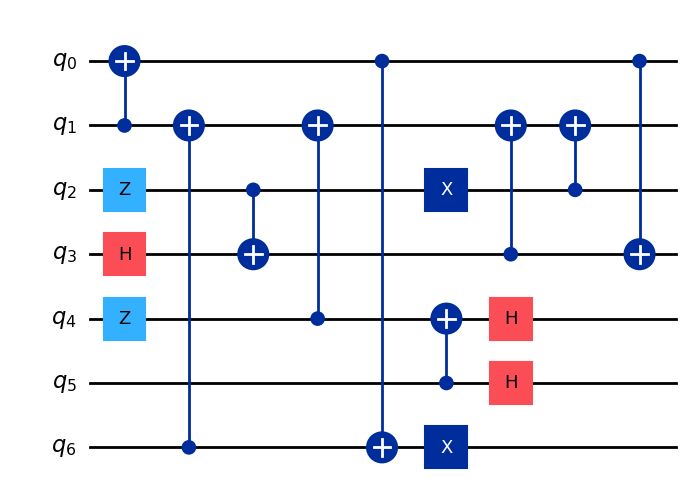

In [58]:
# get a random circuit
from Data.RandomCircuitGenerator import RandomCircuitGenerator

num_qubits = 6
depth = 5

rcg = RandomCircuitGenerator(qubits_range=(4,7))

qc = rcg.generate_circuit(depth=5, max_gates=100)
qc.draw(output='mpl')

In [59]:
# Construct QuantumCircuitGraph object
qcg = QuantumCircuitGraph(qc)

Successfully applied transformation: change_basis
Failed to apply transformation 'remove_identity' due to error: No matching subgraphs found for the given pattern.
Failed to apply transformation 'parallel_x' due to error: No matching subgraphs found for the given pattern.
Failed to apply transformation 'parallel_x' due to error: No matching subgraphs found for the given pattern.
Successfully applied transformation: cnot_decomp


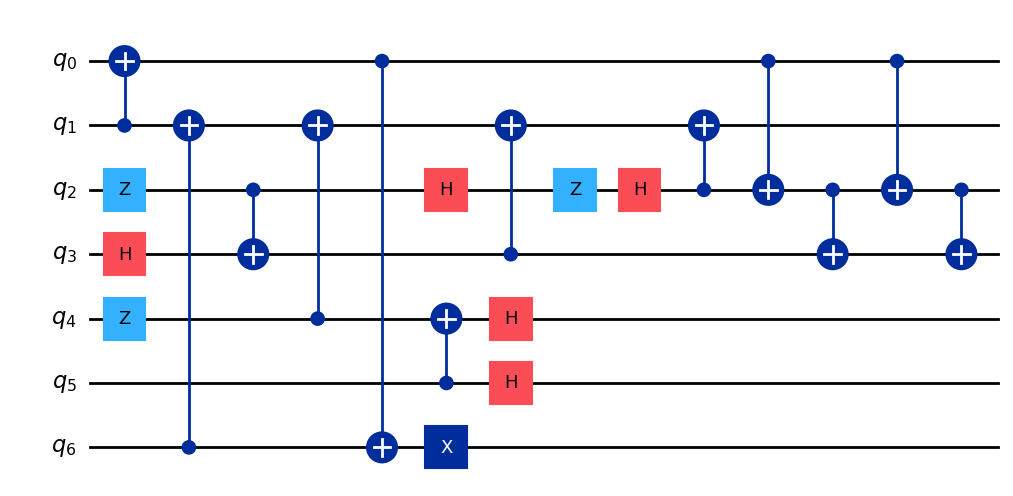

In [60]:
from QCCL.transformations import RandomCompositeTransformation
random_composite_transform = RandomCompositeTransformation(qcg, num_transformations=2)

# Apply random transformations
final_qcg = random_composite_transform.apply()

final_qcg.quantum_circuit.draw(output='mpl')

In [61]:
from qiskit.visualization import circuit_drawer
import matplotlib.pyplot as plt

def plot_original_and_transformed(original_circuit, transformed_circuit):
    """Plot the original and transformed quantum circuits side by side."""
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Plot the original circuit
    circuit_drawer(original_circuit, output='mpl', ax=axes[0])
    axes[0].set_title("Original Circuit")

    # Plot the transformed circuit
    circuit_drawer(transformed_circuit, output='mpl', ax=axes[1])
    axes[1].set_title("Transformed Circuit")

    plt.show()

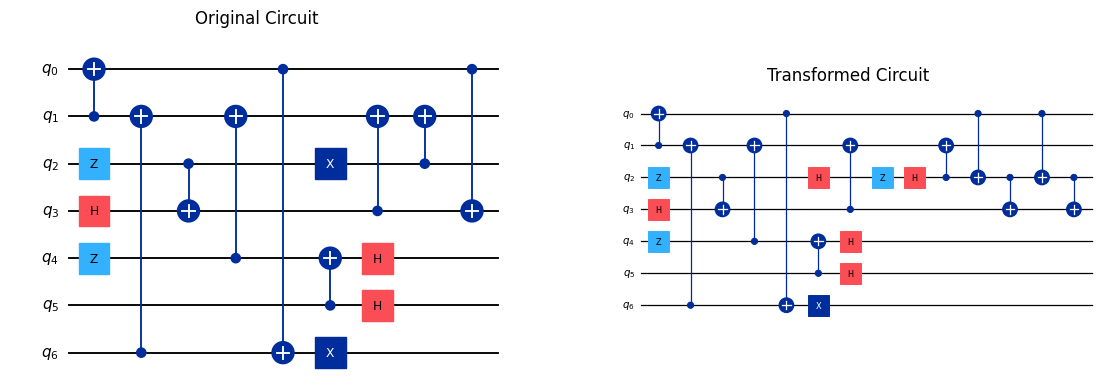

In [62]:
plot_original_and_transformed(qc, final_qcg.quantum_circuit)